### Importaci√≥n de datos



In [ ]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



# **Facturaci√≥n**
An√°lisis por tienda: En esta secci√≥n se analiza la facturaci√≥n total por tienda con base en los datos disponibles.

In [ ]:
# Facturaci√≥n por tienda
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Tienda 1 factur√≥: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2 factur√≥: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3 factur√≥: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4 factur√≥: ${facturacion_tienda4:,.2f}")

# Crear un diccionario con los totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturaci√≥n
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

print(f"\nLa tienda que m√°s factur√≥ fue: {tienda_mayor} con ${mayor_valor:,.2f}")
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Tienda 1 factur√≥: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2 factur√≥: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3 factur√≥: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4 factur√≥: ${facturacion_tienda4:,.2f}")

# Crear un diccionario con los totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturaci√≥n
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

print(f"\nLa tienda que m√°s factur√≥ fue: {tienda_mayor} con ${mayor_valor:,.2f}")


Tienda 1 factur√≥: $1,150,880,400.00
Tienda 2 factur√≥: $1,116,343,500.00
Tienda 3 factur√≥: $1,098,019,600.00
Tienda 4 factur√≥: $1,038,375,700.00

La tienda que m√°s factur√≥ fue: Tienda 1 con $1,150,880,400.00
Tienda 1 factur√≥: $1,150,880,400.00
Tienda 2 factur√≥: $1,116,343,500.00
Tienda 3 factur√≥: $1,098,019,600.00
Tienda 4 factur√≥: $1,038,375,700.00

La tienda que m√°s factur√≥ fue: Tienda 1 con $1,150,880,400.00


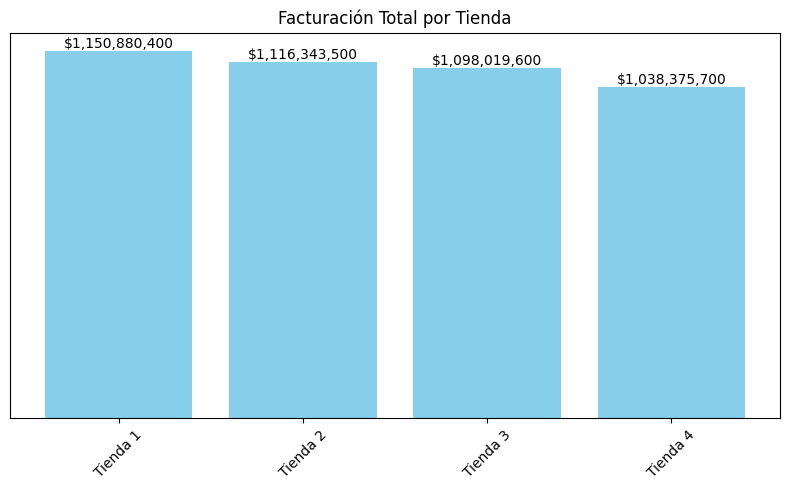

In [ ]:
# Nombres de las tiendas (eje x)
tiendas = list(facturaciones.keys())

# Valores de facturaci√≥n (eje y)
valores_facturacion = list(facturaciones.values())

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores_facturacion, color='skyblue')

# A√±adir t√≠tulo
plt.title('Facturaci√≥n Total por Tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, valor in enumerate(valores_facturacion):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.yticks([])  # Esto elimina los n√∫meros del eje Y

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

```
# Esto tiene formato de c√≥digo
```
En el gr√°fico anterior se puede analizar y observar que la tienda 1, Muestra la facturacion mas alta. Sin embargo, la comparaci√≥n en el nivel de facturaci√≥n entre todas las tiendas no es muy elevada.

# 2. Ventas por categor√≠a

In [ ]:
# Crear diccionario con las tiendas
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

# Imprimir facturaci√≥n por categor√≠a en cada tienda con formato
for nombre, df in tiendas.items():
    facturacion_categoria = df.groupby('Categor√≠a del Producto')['Precio'].sum()
    print(f"\nFacturaci√≥n por categor√≠a en {nombre}:")

    for categoria, valor in facturacion_categoria.sort_values(ascending=False).items():
        print(f"  {categoria}: ${valor:,.2f}")

# Crear un DataFrame con la facturaci√≥n por categor√≠a para cada tienda
facturacion_por_categoria = pd.DataFrame()

for nombre, df in tiendas.items():
    # Agrupar por categor√≠a y sumar la facturaci√≥n
    facturacion_categoria = df.groupby('Categor√≠a del Producto')['Precio'].sum()
    facturacion_por_categoria[nombre] = facturacion_categoria


Facturaci√≥n por categor√≠a en Tienda 1:
  Electr√≥nicos: $429,493,500.00
  Electrodom√©sticos: $363,685,200.00
  Muebles: $187,633,700.00
  Instrumentos musicales: $91,299,000.00
  Deportes y diversi√≥n: $39,290,000.00
  Juguetes: $17,995,700.00
  Art√≠culos para el hogar: $12,698,400.00
  Libros: $8,784,900.00

Facturaci√≥n por categor√≠a en Tienda 2:
  Electr√≥nicos: $410,831,100.00
  Electrodom√©sticos: $348,567,800.00
  Muebles: $176,426,300.00
  Instrumentos musicales: $104,990,300.00
  Deportes y diversi√≥n: $34,744,500.00
  Juguetes: $15,945,400.00
  Art√≠culos para el hogar: $14,746,900.00
  Libros: $10,091,200.00

Facturaci√≥n por categor√≠a en Tienda 3:
  Electr√≥nicos: $410,775,800.00
  Electrodom√©sticos: $329,237,900.00
  Muebles: $201,072,100.00
  Instrumentos musicales: $77,380,900.00
  Deportes y diversi√≥n: $35,593,100.00
  Juguetes: $19,401,100.00
  Art√≠culos para el hogar: $15,060,000.00
  Libros: $9,498,700.00

Facturaci√≥n por categor√≠a en Tienda 4:
  Electr√≥n

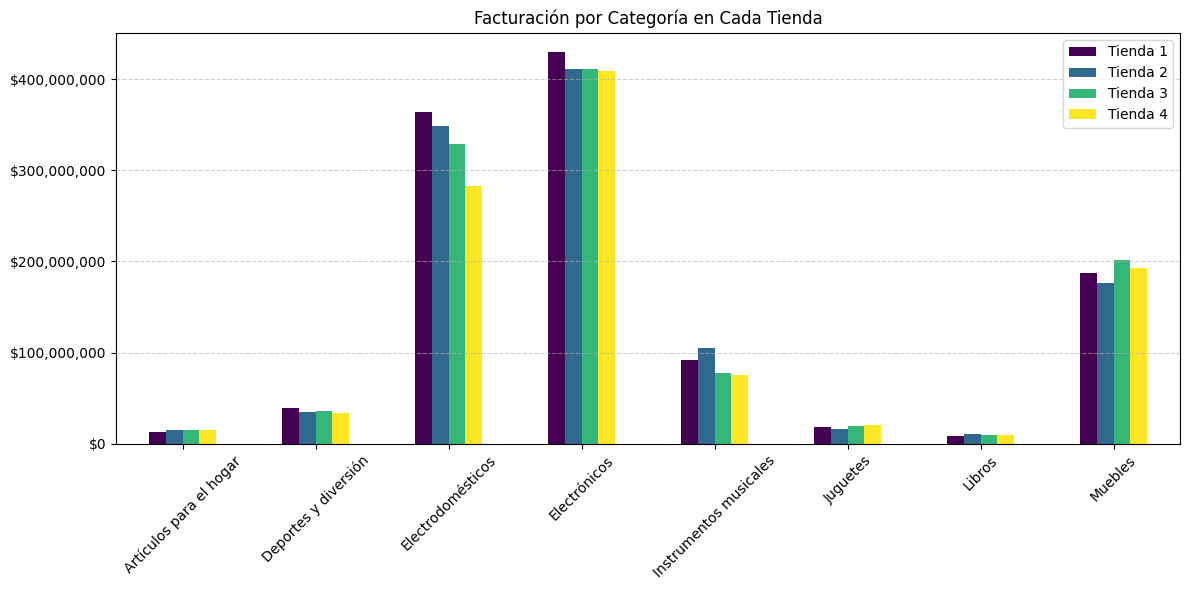

In [ ]:
#Crear gr√°fico de barras agrupadas
ax = facturacion_por_categoria.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# A√±adir t√≠tulo y etiquetas
plt.title('Facturaci√≥n por Categor√≠a en Cada Tienda')
ax.set_xlabel('')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Formatear los valores en el eje Y con comas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Ajustar la disposici√≥n
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

Despu√©s de analizar la facturaci√≥n total por categor√≠a de producto por cada tienda, podemos observar que la categor√≠a Electr√≥nica es la que genera mayores ingresos en todas las tiendas, y libros es la que menos ingresos genera.

Ademas, Electr√≥nica supera a otras categor√≠as en t√©rminos de facturaci√≥n total. Esto se debe a que los productos electr√≥nicos tienen un valor unitario m√°s alto, lo que implica que, aunque la cantidad de ventas no sea tan alta, el precio de cada unidad compensa esta diferencia, generando as√≠ ingreso mayores.

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

calificaciones_promedio = {}

for nombre, df in tiendas.items():
    promedio_calificacion = df['Calificaci√≥n'].mean()
    calificaciones_promedio[nombre] = promedio_calificacion
    # Mostrar calificaci√≥n promedio por tienda
    print(f"Calificaci√≥n promedio en {nombre}: {promedio_calificacion:.4f}")

Calificaci√≥n promedio en Tienda 1: 3.9767
Calificaci√≥n promedio en Tienda 2: 4.0373
Calificaci√≥n promedio en Tienda 3: 4.0483
Calificaci√≥n promedio en Tienda 4: 3.9958


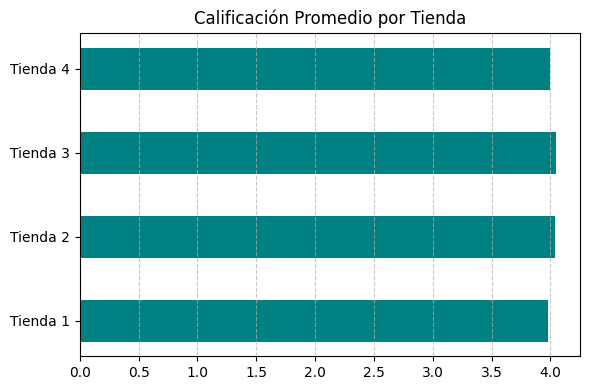

In [ ]:
# Crear gr√°fico de barras horizontales para mostrar la calificaci√≥n promedio por tienda
plt.figure(figsize=(6, 4))
plt.barh(list(calificaciones_promedio.keys()), list(calificaciones_promedio.values()), color='teal', height=0.5)

# A√±adir t√≠tulo
plt.title('Calificaci√≥n Promedio por Tienda')

# Quitar las etiquetas de los ejes
plt.xlabel('')
plt.ylabel('')

# A√±adir la grilla
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar la disposici√≥n
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

El an√°lisis de las calificaciones promedio por tienda muestra que:

Tienda 3 tiene la calificaci√≥n promedio m√°s alta, con un 4.05.

Tienda 2 sigue de cerca con una calificaci√≥n promedio de 4.04.

Tienda 4 tiene una calificaci√≥n de 4.00, que tambi√©n es bastante alta.

Tienda 1 presenta la calificaci√≥n promedio m√°s baja con 3.98, pero a√∫n est√° bastante cerca de las dem√°s.

En general, todas las tiendas tienen calificaciones muy cercanas entre s√≠, oscilando entre 3.98 y 4.05, lo que indica una valoraci√≥n bastante positiva por parte de los clientes en general.

# 4. Productos m√°s y menos vendidos

In [ ]:
# Crear diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Mostrar ventas por categor√≠a, categor√≠a m√°s y menos vendida en cada tienda
for nombre, df in tiendas.items():
    ventas_categoria = df['Categor√≠a del Producto'].value_counts()
    total_ventas = ventas_categoria.sum()  # Total de productos vendidos

    print(f"\nVentas por categor√≠a en {nombre}:\n{ventas_categoria}")

    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_max = ventas_categoria.max()

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_min = ventas_categoria.min()

    print(f"Categor√≠a m√°s vendida: {categoria_mas_vendida} ({ventas_max} ventas)")
    print(f"Categor√≠a menos vendida: {categoria_menos_vendida} ({ventas_min} ventas)")
    print(f"Total de productos vendidos: {total_ventas} productos")

# Crear tabla resumen con ventas por categor√≠a en cada tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': tienda1['Categor√≠a del Producto'].value_counts(),
    'Tienda 2': tienda2['Categor√≠a del Producto'].value_counts(),
    'Tienda 3': tienda3['Categor√≠a del Producto'].value_counts(),
    'Tienda 4': tienda4['Categor√≠a del Producto'].value_counts()
}).fillna(0)


Ventas por categor√≠a en Tienda 1:
Categor√≠a del Producto
Muebles                    465
Electr√≥nicos               448
Juguetes                   324
Electrodom√©sticos          312
Deportes y diversi√≥n       284
Instrumentos musicales     182
Libros                     173
Art√≠culos para el hogar    171
Name: count, dtype: int64
Categor√≠a m√°s vendida: Muebles (465 ventas)
Categor√≠a menos vendida: Art√≠culos para el hogar (171 ventas)
Total de productos vendidos: 2359 productos

Ventas por categor√≠a en Tienda 2:
Categor√≠a del Producto
Muebles                    442
Electr√≥nicos               422
Juguetes                   313
Electrodom√©sticos          305
Deportes y diversi√≥n       275
Instrumentos musicales     224
Libros                     197
Art√≠culos para el hogar    181
Name: count, dtype: int64
Categor√≠a m√°s vendida: Muebles (442 ventas)
Categor√≠a menos vendida: Art√≠culos para el hogar (181 ventas)
Total de productos vendidos: 2359 productos

Ventas por cate

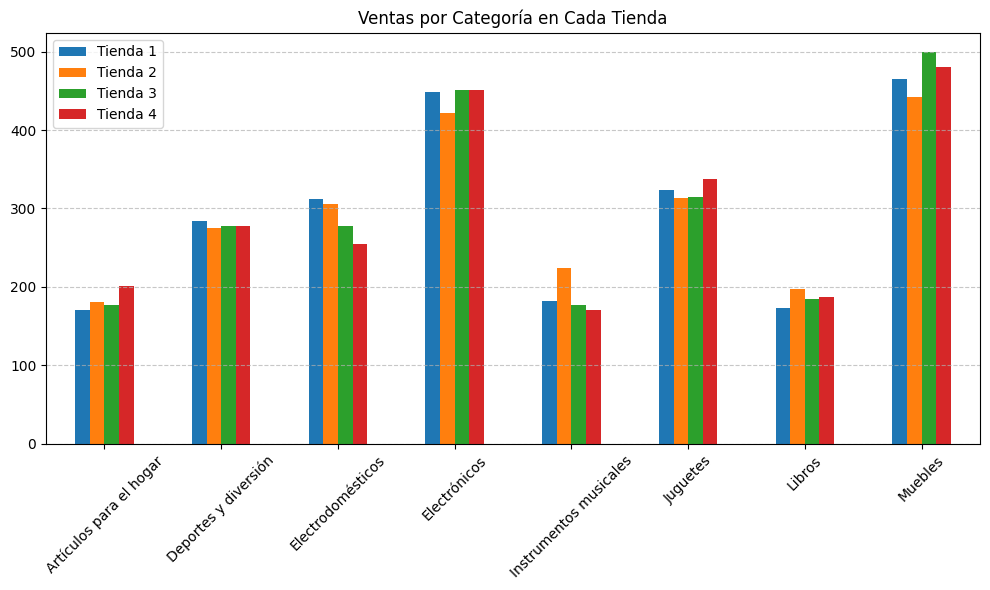

In [ ]:
# Crear gr√°fico de barras agrupadas
ax = ventas_por_categoria.plot(kind='bar', figsize=(10, 6))  # Guarda en 'ax'
plt.title('Ventas por Categor√≠a en Cada Tienda')
ax.set_xlabel('')  # Esto ahora s√≠ funciona porque 'ax' est√° definido correctamente
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se puede observar que los productos electr√≥nicos y los muebles son las categ√≥rias m√°s vendidas en todas las tiendas. Por otro lado las categorias instrumentos musicales y articulos para el hogar son los menos vendidos. A pesar de que muebles es la categoria mas vendida, esta no representa el mayor ingreso, debido a que el precio de estos articulos son inferiores a otros como los equipos electr√≥nicos.

# 5. Env√≠o promedio por tienda

In [ ]:
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}

for nombre, df in tiendas.items():
    promedio = df['Costo de env√≠o'].mean()
    costo_envio_promedio[nombre] = promedio
    # Mostrar costo de env√≠o promedio de la tienda
    print(f"Costo de env√≠o promedio en {nombre}: ${promedio:,.2f}")

Costo de env√≠o promedio en Tienda 1: $26,018.61
Costo de env√≠o promedio en Tienda 2: $25,216.24
Costo de env√≠o promedio en Tienda 3: $24,805.68
Costo de env√≠o promedio en Tienda 4: $23,459.46


In [ ]:
costo_envio_total = {}

for nombre, df in tiendas.items():
    total = df['Costo de env√≠o'].sum()
    costo_envio_total[nombre] = total
    print(f"Costo de env√≠o total en {nombre}: ${total:,.2f}")

Costo de env√≠o total en Tienda 1: $61,377,900.00
Costo de env√≠o total en Tienda 2: $59,485,100.00
Costo de env√≠o total en Tienda 3: $58,516,600.00
Costo de env√≠o total en Tienda 4: $55,317,400.00


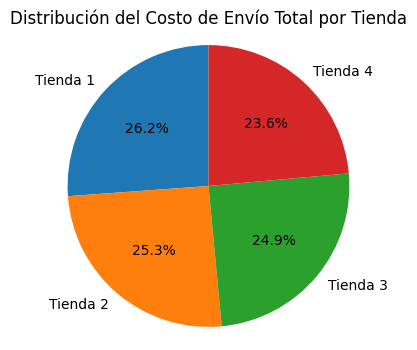

In [ ]:
# Crear el gr√°fico de torta
plt.figure(figsize=(4, 4))
plt.pie(costo_envio_total.values(), labels=costo_envio_total.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribuci√≥n del Costo de Env√≠o Total por Tienda')
plt.axis('equal')  # Para que el gr√°fico de torta sea circular
plt.show()

Podemos evidenciar que el costo de envio en todas las tiendas no es muy variado. A pesar que la tienda 1 es la que mas ingresos genera, tambien es la que tiene un mayor costo de envio , y esto es normal. Las demas tiendas mantienen su proporcion entre las ventas y el costo de envio.

## √çndice de eficiencia  
podemos calcular la eficiencia de la tienda , teniendo en cuenta los ingresos y el costo de envio.

El √≠ndice de eficiencia se calcula con la siguiente f√≥rmula:

$$ \text{√çndice de eficiencia} = \frac{\text{Ventas Totales}}{\text{Costo de Env√≠o Total}} $$


Se analizan las cuatro tiendas utilizando dos indicadores clave:

Ingresos totales (ventas generadas por cada tienda).

Costo total de env√≠o (gastos en log√≠stica).

√çndice de eficiencia (relaci√≥n entre ingresos y costos de env√≠o, es decir, cu√°ntos pesos se facturan por cada peso gastado en env√≠o).texto en cursiva

In [23]:
# Calcular el √≠ndice de eficiencia
indice_eficiencia = {}
for nombre in costo_envio_total:
    ventas = facturaciones.get(nombre, 0)
    costo_envio = costo_envio_total[nombre]
    indice_eficiencia[nombre] = ventas / costo_envio if costo_envio != 0 else 0

# Imprimir el √≠ndice de eficiencia por tienda
for nombre, indice in indice_eficiencia.items():
    print(f"√çndice de eficiencia de {nombre}: {indice:.2f}")

# Identificar la tienda con el peor rendimiento (√≠ndice m√°s bajo)
tienda_peor = min(indice_eficiencia, key=indice_eficiencia.get)

print(f"\nLa tienda con el indice de ediciencia mas bajo es: {tienda_peor}")

√çndice de eficiencia de Tienda 1: 18.75
√çndice de eficiencia de Tienda 2: 18.77
√çndice de eficiencia de Tienda 3: 18.76
√çndice de eficiencia de Tienda 4: 18.77

La tienda con el indice de ediciencia mas bajo es: Tienda 1


# **Representaci√≥n:**  
La Tienda 1 tiene el √≠ndice de eficiencia m√°s bajo, lo que significa que, en proporci√≥n, es la que menos dinero genera por cada peso invertido en env√≠os.

Sin embargo, la diferencia con las dem√°s tiendas es m√≠nima (menos de 0.02 puntos), por lo tanto, no es una se√±al fuerte por s√≠ sola para tomar una decisi√≥n dr√°stica como cerrar o vender la tienda.

Adem√°s, la Tienda 1 es la que m√°s ingresos genera en total, lo cual es un punto muy positivo.

#An√°lisis del desempe√±o geogr√°fico

1.   Elemento de la lista
2.   Elemento de la lista

In [ ]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todas las tiendas en un solo DataFrame
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# se asegura que no haya valores nulos en lat/lon
df_tiendas = df_tiendas.dropna(subset=['lat', 'lon'])

# Crear mapa centrado en el promedio de coordenadas
m = folium.Map(location=[df_tiendas['lat'].mean(), df_tiendas['lon'].mean()], zoom_start=6)

# Crear datos para el mapa de calor (lat, lon, intensidad = precio de venta)
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_tiendas.iterrows()]

# A√±adir el mapa de calor
HeatMap(heat_data, radius=13).add_to(m)

# Mostrar el mapa
m


Podemos evidenciar cuales ciudades generan mas ingreso:

1.   Elemento de la lista
2.   Elemento de la lista


In [ ]:
# Agrupar las ventas por ciudad y tienda
ventas_por_ciudad_tienda = df_tiendas.groupby(['Lugar de Compra', 'Tienda'])['Precio'].sum().unstack(fill_value=0)

# Sumar las ventas por ciudad (por todas las tiendas)
ventas_por_ciudad_total = ventas_por_ciudad_tienda.sum(axis=1)

# Ordenar por ventas totales de mayor a menor
ventas_por_ciudad_tienda_ordenado = ventas_por_ciudad_tienda.loc[ventas_por_ciudad_total.sort_values(ascending=False).index]

# Formatear los n√∫meros para eliminar la notaci√≥n cient√≠fica usando apply en lugar de applymap
ventas_por_ciudad_tienda_ordenado_formateado = ventas_por_ciudad_tienda_ordenado.apply(lambda col: col.map(lambda x: f'{x:,.2f}'))

# Mostrar el DataFrame con las ventas ordenadas por ciudad y sin notaci√≥n cient√≠fica
print(ventas_por_ciudad_tienda_ordenado_formateado)

Tienda                 Tienda 1        Tienda 2        Tienda 3  \
Lugar de Compra                                                   
Bogot√°           440,005,000.00  479,959,200.00  475,562,100.00   
Medell√≠n         296,858,100.00  297,246,700.00  250,580,600.00   
Cali             154,493,700.00  118,257,600.00  109,287,600.00   
Pereira           56,214,300.00   43,073,800.00   62,504,500.00   
Barranquilla      32,907,700.00   27,741,300.00   36,768,500.00   
Cartagena         22,296,700.00   21,548,300.00   34,144,100.00   
C√∫cuta            37,879,500.00   28,991,500.00   25,165,500.00   
Bucaramanga       17,579,200.00   23,895,600.00   23,538,900.00   
Riohacha          18,512,700.00   12,656,400.00   19,025,900.00   
Leticia           14,669,800.00   16,159,000.00   19,212,800.00   
Santa Marta       13,198,300.00   13,829,300.00   12,854,300.00   
Pasto             14,996,400.00   12,800,100.00    6,801,300.00   
Neiva              3,494,000.00    3,839,400.00    4,359,50

Como se puede evidenciar las ciudades m√°s grandes de colombia, son las que m√°s ingresos generan. Esto es com√∫n dado que en las ciudades mas grandes hay mas consumidores, hay mas ingresos , y por lo tanto, permiten un mayor consumo.

# Conclusi√≥n

**¬øqu√© tienda deber√≠a vender el Sr. Juan?**

In [43]:
def resumen_tienda(nombre, df):
    facturacion = df["Precio"].sum()
    # Access the 'Calificaci√≥n' column instead of 'calificacion_promedio'
    calif = df["Calificaci√≥n"].mean()
    envio = df["Costo de env√≠o"].mean()

    mas_v = df.groupby("Producto")["Categor√≠a del Producto"].sum().sort_values(ascending=False)
    mas_vendido = mas_v.index[0]
    mas_v_cant = mas_v.values[0]

    return {
        "Tienda": nombre,
        "Facturaci√≥n Total": round(facturacion, 2),
        "Calificaci√≥n Promedio": round(calif, 2),
        "Env√≠o Promedio": round(envio, 2),
        "Producto M√°s Vendido": f"{mas_vendido} ({mas_v_cant})"
    }

# Crear resumen
resumen = [
    resumen_tienda("Tienda 1", tienda1),
    resumen_tienda("Tienda 2", tienda2),
    resumen_tienda("Tienda 3", tienda3),
    resumen_tienda("Tienda 4", tienda4),
]

 # Mostrar tabla
resumen_df = pd.DataFrame(resumen)
display(resumen_df)

# Recomendaci√≥n autom√°tica
mejor_fact = resumen_df.loc[resumen_df["Facturaci√≥n Total"].idxmax()]
mejor_calif = resumen_df.loc[resumen_df["Calificaci√≥n Promedio"].idxmax()]

if mejor_fact["Tienda"] == mejor_calif["Tienda"]:
    recomendacion = f"‚úÖ Se recomienda que el Sr. Juan venda en **{mejor_fact['Tienda']}** porque tiene la **mayor facturaci√≥n** (${mejor_fact['Facturaci√≥n Total']}) y tambi√©n la **mejor calificaci√≥n promedio** ({mejor_fact['Calificaci√≥n Promedio']})."
else:
    recomendacion = (
        f"üìå La **{mejor_fact['Tienda']}** tiene la mayor facturaci√≥n (${mejor_fact['Facturaci√≥n Total']}), "
        f"pero la **{mejor_calif['Tienda']}** tiene la mejor calificaci√≥n ({mejor_calif['Calificaci√≥n Promedio']}).\n\n"
        f"üëâ Si el Sr. Juan busca **ganancias**, elija *{mejor_fact['Tienda']}*.\n"
        f"üëâ Si busca **reputaci√≥n y experiencia del cliente**, elija *{mejor_calif['Tienda']}*."
    )
    print(recomendacion)

Tienda  Facturaci√≥n Total  Calificaci√≥n Promedio  Env√≠o Promedio  \
0  Tienda 1       1.150880e+09                   3.98        26018.61   
1  Tienda 2       1.116344e+09                   4.04        25216.24   
2  Tienda 3       1.098020e+09                   4.05        24805.68   
3  Tienda 4       1.038376e+09                   4.00        23459.46   

                                Producto M√°s Vendido  
0  Armario (MueblesMueblesMueblesMueblesMueblesMu...  
1  Armario (MueblesMueblesMueblesMueblesMueblesMu...  
2  Kit de bancas (MueblesMueblesMueblesMueblesMue...  
3  Cama box (MueblesMueblesMueblesMueblesMueblesM...

üìå La **Tienda 1** tiene la mayor facturaci√≥n ($1150880400.0), pero la **Tienda 3** tiene la mejor calificaci√≥n (4.05).

üëâ Si el Sr. Juan busca **ganancias**, elija *Tienda 1*.
üëâ Si busca **reputaci√≥n y experiencia del cliente**, elija *Tienda 3*.


# **Graficos**
En estos 3 gr√°ficos de barras te mostrare a continuaci√≥n:

**Una tabla comparativa bien ordenada.**

**Una recomendaci√≥n autom√°tica clara.**

**Tres gr√°ficos de barras para comparar: facturaci√≥n, calificaci√≥n y env√≠o promedio.**

**Facturaci√≥n Total por tienda.**

**Calificaci√≥n promedio (0 a 5).**

**Costo de env√≠o promedio.**

Todo lo que necesitas el Sr. Juan  visualmente para poder tomar una decisi√≥n inteligente.

### üìã Tabla Comparativa de Tiendas

Tienda  Facturaci√≥n Total  Calificaci√≥n Promedio  Env√≠o Promedio  \
0  Tienda 1       1.150880e+09                   3.98        26018.61   
1  Tienda 2       1.116344e+09                   4.04        25216.24   
2  Tienda 3       1.098020e+09                   4.05        24805.68   
3  Tienda 4       1.038376e+09                   4.00        23459.46   

              Producto M√°s Vendido  
0           Secadora de ropa (214)  
1  Iniciando en programaci√≥n (223)  
2                  Bicicleta (191)  
3    Dashboards con Power BI (196)

### üß† Recomendaci√≥n para el Sr. Juan
üìå La **Tienda 1** tiene la mayor facturaci√≥n ($1150880400.0), pero la **Tienda 3** tiene la mejor calificaci√≥n (4.05).

üëâ Si el Sr. Juan busca **ganancias**, elija *Tienda 1*.
üëâ Si busca **reputaci√≥n y experiencia del cliente**, elija *Tienda 3*.

<ipython-input-61-d1430b4d198c>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x="Tienda", y="Facturaci√≥n Total", data=resumen_df, palette="Blues_d")
<ipython-input-61-d1430b4d198c>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x="Tienda", y="Calificaci√≥n Promedio", data=resumen_df, palette="Greens_d")
<ipython-input-61-d1430b4d198c>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[2], x="Tienda", y="Env√≠o Promedio", data=resumen_df, palette="Oranges_d")
<ipython-input-61-d1430b4d198c>:69: UserWarning:

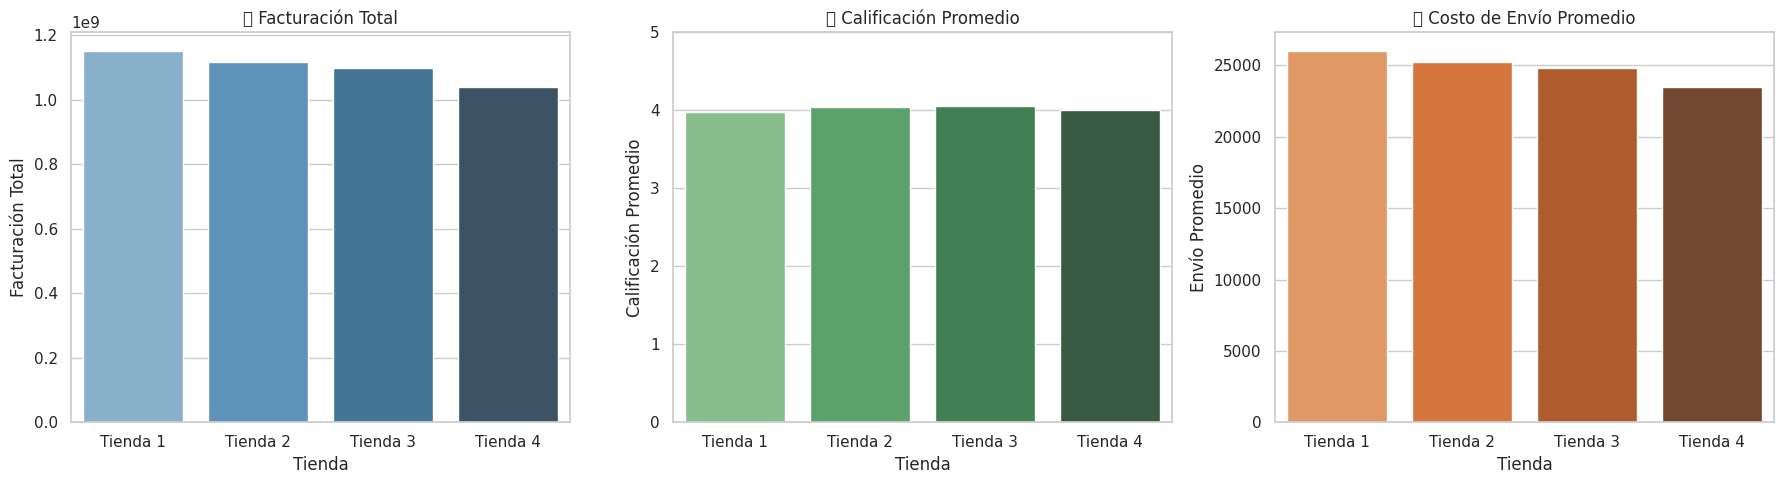

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Funci√≥n resumen (debes haber cargado las tiendas primero)
def resumen_tienda(nombre, df):
    facturacion = df["Precio"].sum()
    calif = df["Calificaci√≥n"].mean()
    # Assuming 'Costo de env√≠o' is the correct column name for shipping cost
    mas_v = df.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
    mas_vendido = mas_v.index[0]
    mas_v_cant = mas_v.values[0]
    return {
        "Tienda": nombre,
        "Facturaci√≥n Total": round(facturacion, 2),
        "Calificaci√≥n Promedio": round(calif, 2),
        # Changed 'Env√≠o' to 'Costo de env√≠o'
        "Env√≠o Promedio": round(df["Costo de env√≠o"].mean(), 2),
        "Producto M√°s Vendido": f"{mas_vendido} ({mas_v_cant})"
    }

# Crear resumen
resumen = [
    resumen_tienda("Tienda 1", tienda1),
    resumen_tienda("Tienda 2", tienda2),
    resumen_tienda("Tienda 3", tienda3),
    resumen_tienda("Tienda 4", tienda4),
]
resumen_df = pd.DataFrame(resumen)

# Mostrar tabla
from IPython.display import display, Markdown
display(Markdown("### üìã Tabla Comparativa de Tiendas"))
display(resumen_df)

# Recomendaci√≥n autom√°tica
mejor_fact = resumen_df.loc[resumen_df["Facturaci√≥n Total"].idxmax()]
mejor_calif = resumen_df.loc[resumen_df["Calificaci√≥n Promedio"].idxmax()]
if mejor_fact["Tienda"] == mejor_calif["Tienda"]:
    recomendacion = f"‚úÖ Se recomienda que el Sr. Juan venda en **{mejor_fact['Tienda']}** porque tiene la **mayor facturaci√≥n** (${mejor_fact['Facturaci√≥n Total']}) y tambi√©n la **mejor calificaci√≥n promedio** ({mejor_fact['Calificaci√≥n Promedio']})."
else:
    recomendacion = (
        f"üìå La **{mejor_fact['Tienda']}** tiene la mayor facturaci√≥n (${mejor_fact['Facturaci√≥n Total']}), "
        f"pero la **{mejor_calif['Tienda']}** tiene la mejor calificaci√≥n ({mejor_calif['Calificaci√≥n Promedio']}).\n\n"
        f"üëâ Si el Sr. Juan busca **ganancias**, elija *{mejor_fact['Tienda']}*.\n"
        f"üëâ Si busca **reputaci√≥n y experiencia del cliente**, elija *{mejor_calif['Tienda']}*."
    )
display(Markdown(f"### üß† Recomendaci√≥n para el Sr. Juan\n{recomendacion}"))

# Estilo visual
sns.set(style="whitegrid")

# Gr√°ficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Facturaci√≥n
sns.barplot(ax=axs[0], x="Tienda", y="Facturaci√≥n Total", data=resumen_df, palette="Blues_d")
axs[0].set_title("üí∞ Facturaci√≥n Total")

# Calificaci√≥n
sns.barplot(ax=axs[1], x="Tienda", y="Calificaci√≥n Promedio", data=resumen_df, palette="Greens_d")
axs[1].set_title("‚≠ê Calificaci√≥n Promedio")
axs[1].set_ylim(0, 5)

# Env√≠o por Producto
sns.barplot(ax=axs[2], x="Tienda", y="Env√≠o Promedio", data=resumen_df, palette="Oranges_d")
axs[2].set_title("üöö Costo de Env√≠o Promedio")

plt.tight_layout()
plt.show()